In [1]:
import fitz  # PyMuPDF
import pandas as pd
import matplotlib.pyplot as plt
import os

def extract_pdf_attributes(pdf_path, page_number, output_csv_path):
    """
    指定したPDFファイルのブロック・ライン・スパン単位でデータ属性を取得し、CSV形式で出力。
    
    Args:
        pdf_path (str): PDFファイルのパス。
        page_number (int): ページ番号（1から始まる）。
        output_csv_path (str): 出力するCSVファイルのパス。
        
    Returns:
        pd.DataFrame: 取得したデータ属性を保持するデータフレーム。
    """
    try:
        # PDFを開く
        doc = fitz.open(pdf_path)
        
        # ページ番号が正しいか確認
        if page_number < 1 or page_number > len(doc):
            print(f"エラー: ページ番号は1から{len(doc)}の間で指定してください。")
            return None
        
        # 対象ページを取得（0インデックス）
        page = doc[page_number - 1]
        
        # ページ内のブロックを取得
        blocks = page.get_text("dict")["blocks"]
        
        # データ保持用リスト
        data = []
        
        for block_no, block in enumerate(blocks, start=1):
            if "lines" not in block:
                continue  # ブロックに行がない場合はスキップ
            
            for line_no, line in enumerate(block["lines"], start=1):
                if "spans" not in line:
                    continue  # 行にスパンがない場合はスキップ
                
                for span_no, span in enumerate(line["spans"], start=1):
                    # 各スパンの属性を取得
                    text = span.get("text", "")
                    bbox = line["bbox"]
                    font = span.get("font", "")
                    size = span.get("size", "")
                    color = span.get("color", "")
                    text_type = span.get("flags", "")
                    origin = span.get("origin", (None, None))  # originを取得
                    ascender = span.get("ascender", None)      # ascenderを取得
                    
                    # データをリストに追加
                    data.append({
                        "page_no": page_number,
                        "block_no": block_no,
                        "line_no": line_no,
                        "span_no": span_no,
                        "text": text,
                        "origin_x": origin[0],
                        "origin_y": origin[1],
                        "bbox_x0": bbox[0],
                        "bbox_y0": bbox[1],
                        "bbox_x1": bbox[2],
                        "bbox_y1": bbox[3],
                        "font": font,
                        "size": size,
                        "color": color,
                        "text_type": text_type,
                        "ascender": ascender,
                    })
        
        # PDFを閉じる
        doc.close()
        
        # pandasデータフレームに変換
        df = pd.DataFrame(data)
        
        # CSVとして出力
        df.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
        print(f"CSVファイルが出力されました: {output_csv_path}")
        
        return df
    except Exception as e:
        print(f"エラーが発生しました: {e}")
        return None


In [2]:
# 使用例
# 対象のPDFファイルを指定
base_dir = "ir/2025/"
#base_dir = "ir/2024/"
#pdf_dir =  "34070_旭化成"
#pdf_filename = "24jp.pdf"
pdf_dir =  "40040_レゾナック・ホールディングス"
pdf_filename = "pdf-sustainability-report-integratedreport-RESONAC24J_spread.pdf"
#pdf_dir =  "41880_三菱ケミカルグループ"
#pdf_filename = "23.pdf"

#================
page_num = 16  # 表示したいページ番号（1ページ目）
#================
pdf_path = base_dir + pdf_dir + "/" + pdf_filename
#extract_line_bbox_and_text(pdf_path, page_number)
#analyze_line_distances(pdf_file, page_num)
info_path = base_dir + pdf_dir + "/info" 
#folderがなければ作成
os.makedirs(info_path, exist_ok=True)

output_file_path = info_path + "/" +"attrib_info_page-" + str(page_num) + ".csv"

# 属性を抽出し、CSVに出力
df_attrib = extract_pdf_attributes(pdf_path, page_num, output_file_path)

# pandasデータフレームを確認
if df_attrib is not None:
    print(df_attrib.head())



CSVファイルが出力されました: ir/2025/40040_レゾナック・ホールディングス/info/attrib_info_page-16.csv
   page_no  block_no  line_no  span_no    text     origin_x    origin_y  \
0       16         1        1        1      30  1067.364014  660.833618   
1       16         2        1        1  データセクシ  1017.863770   23.243896   
2       16         2        2        1       ョ  1057.109619   23.243896   
3       16         2        3        1       ン  1062.807251   23.243896   
4       16         2        4        1   コーポレー   897.561646   23.243896   

       bbox_x0     bbox_y0      bbox_x1     bbox_y1               font  \
0  1067.364014  651.858154  1077.050293  663.472961       DIN2014-Bold   
1  1017.863770   14.761236  1058.427612   25.972237  UDShinGoPr6N-Bold   
2  1057.109619   14.761236  1064.196167   25.972237  UDShinGoPr6N-Bold   
3  1062.807251   14.761236  1069.893799   25.972237  UDShinGoPr6N-Bold   
4   897.561646   14.761236   931.391663   25.972237  UDShinGoPr6N-Bold   

     size     color  text_typ

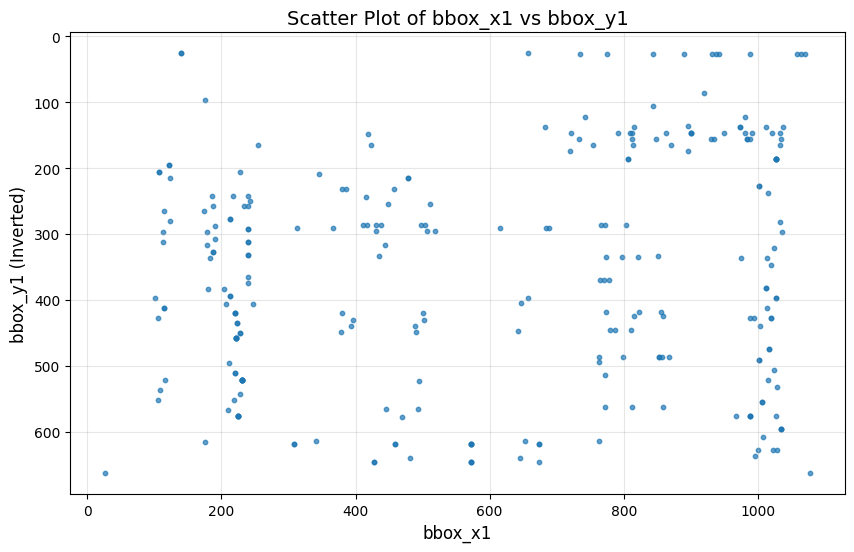

In [3]:
# line_no=1 のデータを抽出
line_1_data = df_attrib

# bbox_x0 と bbox_y0 をプロット (Y軸を上下反転)
plt.figure(figsize=(10, 6))
plt.scatter(line_1_data['bbox_x1'], line_1_data['bbox_y1'], alpha=0.7, s=10)
plt.title('Scatter Plot of bbox_x1 vs bbox_y1', fontsize=14)
plt.xlabel('bbox_x1', fontsize=12)
plt.ylabel('bbox_y1 (Inverted)', fontsize=12)
plt.gca().invert_yaxis()  # Y軸を上下反転
plt.grid(alpha=0.3)

# プロットを保存
#output_file_path = pdf_path[:len(pdf_path)-4] + "_x1-y1_plot_page_" + str(page_num) + ".png"
#plt.savefig(output_file_path, dpi=300, bbox_inches='tight')  # DPIを設定して高解像度で保存

plt.show()


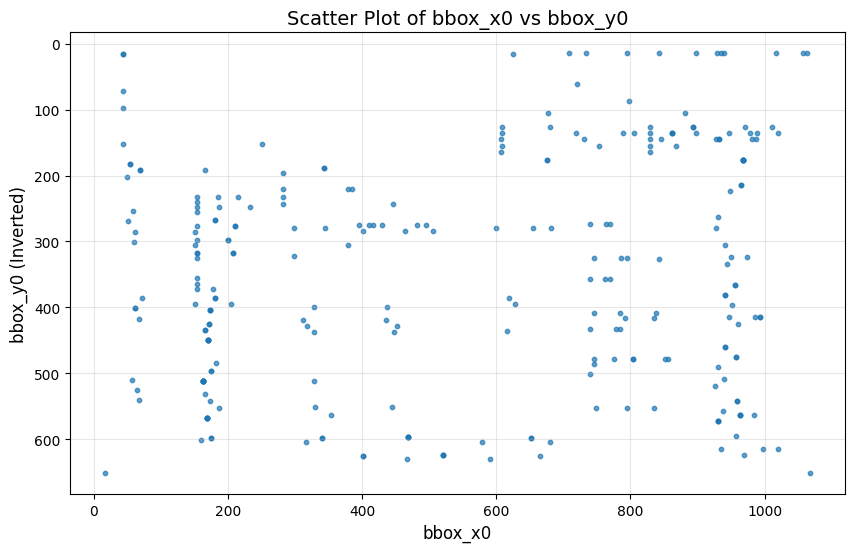

In [4]:
# line_no=1 のデータを抽出
#line_1_data = df

# bbox_x0 と bbox_y0 をプロット (Y軸を上下反転)
plt.figure(figsize=(10, 6))
plt.scatter(line_1_data['bbox_x0'], line_1_data['bbox_y0'], alpha=0.7, s=10)
plt.title('Scatter Plot of bbox_x0 vs bbox_y0', fontsize=14)
plt.xlabel('bbox_x0', fontsize=12)
plt.ylabel('bbox_y0 (Inverted)', fontsize=12)
plt.gca().invert_yaxis()  # Y軸を上下反転
plt.grid(alpha=0.3)

# プロットを保存
#output_file_path = pdf_path[:len(pdf_path)-4] + "_x0-y0_plot_page_" + str(page_num) + ".png"
#plt.savefig(output_file_path, dpi=300, bbox_inches='tight')  # DPIを設定して高解像度で保存

plt.show()

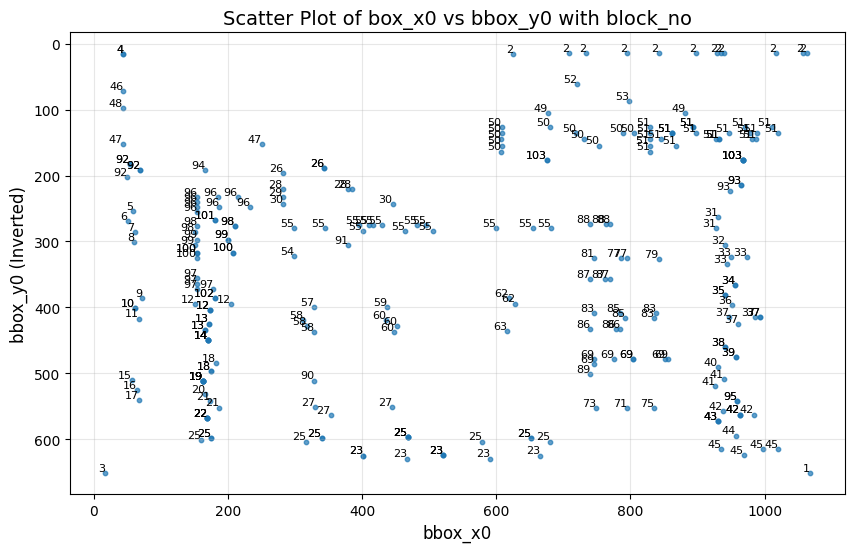

In [5]:
import matplotlib.pyplot as plt

# line_no=1 のデータを抽出
#line_1_data = df

# bbox_x0 と bbox_y0 をプロット (Y軸を上下反転)
plt.figure(figsize=(10, 6))
plt.scatter(line_1_data['bbox_x0'], line_1_data['bbox_y0'], alpha=0.7, s=10)

# block_no を各点に表示
for x, y, block_no in zip(line_1_data['bbox_x0'], line_1_data['bbox_y0'], line_1_data['block_no']):
    plt.text(x, y, str(block_no), fontsize=8, ha='right', va='bottom')  # block_no をラベルとして表示

plt.title('Scatter Plot of box_x0 vs bbox_y0 with block_no', fontsize=14)
plt.xlabel('bbox_x0', fontsize=12)
plt.ylabel('bbox_y0 (Inverted)', fontsize=12)
plt.gca().invert_yaxis()  # Y軸を上下反転
plt.grid(alpha=0.3)

# プロットを保存
output_file_path = info_path  + "/" + "x0-y0_scatter_plot_with_block_no_page-" + str(page_num) + ".png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')  # DPIを設定して高解像度で保存

# プロットを表示
plt.show()


In [6]:
n_show = 40
n_write = 40

sorted_y1 = df_attrib.sort_values(by='bbox_y1', ascending=True)[['block_no', 'bbox_y1', 'text']]
sorted_y0 = df_attrib.sort_values(by='bbox_y0', ascending=False)[['block_no', 'bbox_y0', 'text']]
sorted_x1 = df_attrib.sort_values(by='bbox_x1', ascending=True)[['block_no', 'bbox_x1', 'text']]
sorted_x0 = df_attrib.sort_values(by='bbox_x0', ascending=False)[['block_no', 'bbox_x0', 'text']]

print(sorted_y1.head(n_show))
print()
print(sorted_y0.head(n_show))
print()
print(sorted_x1.head(n_show))
print()
print(sorted_x0.head(n_show))

output_file_path = info_path  + "/" + "Margin_Candidate_list_page-" + str(page_num) + ".txt"

# sorted_y1.head(20) と sorted_y0.head(20) をテキストファイルに書き出す
with open(output_file_path, "w", encoding="utf-8") as file:
    file.write("=== bbox(y1) for Header ===\n")
    file.write(sorted_y1.head(n_write).to_string(index=False))
    file.write("\n\n")  # 改行で区切り
    file.write("=== bbox(y0) for Footer ===\n")
    file.write(sorted_y0.head(n_write).to_string(index=False))
    file.write("\n\n")  # 改行で区切り
    file.write("=== bbox(x0) for Right Margin ===\n")
    file.write(sorted_x0.head(n_write).to_string(index=False))
    file.write("\n\n")  # 改行で区切り
    file.write("=== bbox(x0) for Left Margin ===\n")
    file.write(sorted_x1.head(n_write).to_string(index=False))


     block_no     bbox_y1                   text
14          4   25.855856               RESONAC 
12          2   25.855856               Contents
15          4   25.855856            REPORT 2024
1           2   25.972237                 データセクシ
2           2   25.972237                      ョ
3           2   25.972237                      ン
4           2   25.972237                  コーポレー
5           2   25.972237                      ト
6           2   25.972237                      ・
7           2   25.972237                ガバナンス改革
8           2   25.972237                目指すものとク
9           2   25.972237                リアすべきもの
10          2   25.972237                   レゾナッ
11          2   25.972237                 クの自己紹介
170        52   86.034149           化学の力で実現したい未来
129        46   96.841278               価値創造プロセス
171        53  104.891518                   例えば…
134        49  122.282860              人々の幸せと豊かさ
133        49  122.282860                 地球との共生
146        51  136.7

In [7]:
# line_no=1 のデータを抽出し、コピーを作成
line_1_data = df_attrib[df_attrib['line_no'] == 1].copy()

# bbox_x0 を一定の範囲で丸めてグルーピング
grouping_range = 10  # 10単位でグルーピング
line_1_data['group'] = (line_1_data['bbox_x0'] // grouping_range) * grouping_range

# グループごとに bbox_x0 の最小値と最大値を算出
bbox_x0_groups = line_1_data.groupby('group')['bbox_x0'].agg(['min', 'max', 'count']).reset_index()

# 結果をテキストで出力
#for _, row in bbox_x0_groups.iterrows():
#    print(f"Group: {row['group']} - Min: {row['min']}, Max: {row['max']}, Count: {row['count']}")

# 結果をテキストで出力（小数点2桁で四捨五入）
output_file_path = info_path +"/" +"bbox_x0_counts_page-" + str(page_num) + ".txt"
#output_file_path = 'output.txt'  # 保存するファイル名

with open(output_file_path, 'w', encoding='utf-8') as f:
    print('---- bbox_x0 (line1) counts by range group ----')  # ヘッダーを書き込み
    f.write('---- bbox_x0 (line1) counts by range group ----\n')  # ヘッダーを書き込み
    for _, row in bbox_x0_groups.iterrows():
        min_value = round(row['min'], 2)  # 小数点2桁で四捨五入
        max_value = round(row['max'], 2)  # 小数点2桁で四捨五入
        line = f"Group: {row['group']} - Min: {min_value}, Max: {max_value}, Count: {row['count']}\n"
        print(line.strip())  # コンソールにも出力
        f.write(line)  # ファイルにも書き込み


---- bbox_x0 (line1) counts by range group ----
Group: 10.0 - Min: 17.12, Max: 17.12, Count: 1.0
Group: 40.0 - Min: 43.83, Max: 43.94, Count: 5.0
Group: 50.0 - Min: 50.81, Max: 58.79, Count: 5.0
Group: 60.0 - Min: 60.55, Max: 67.99, Count: 7.0
Group: 70.0 - Min: 71.88, Max: 71.88, Count: 1.0
Group: 150.0 - Min: 150.91, Max: 154.77, Count: 7.0
Group: 160.0 - Min: 160.03, Max: 169.4, Count: 15.0
Group: 170.0 - Min: 171.1, Max: 174.15, Count: 8.0
Group: 180.0 - Min: 181.4, Max: 182.83, Count: 5.0
Group: 280.0 - Min: 282.02, Max: 282.02, Count: 4.0
Group: 290.0 - Min: 298.35, Max: 298.67, Count: 2.0
Group: 310.0 - Min: 311.94, Max: 311.94, Count: 1.0
Group: 320.0 - Min: 328.3, Max: 329.96, Count: 3.0
Group: 370.0 - Min: 379.25, Max: 379.25, Count: 1.0
Group: 400.0 - Min: 402.24, Max: 402.24, Count: 2.0
Group: 430.0 - Min: 435.48, Max: 437.26, Count: 2.0
Group: 600.0 - Min: 608.0, Max: 608.0, Count: 1.0
Group: 610.0 - Min: 616.39, Max: 618.68, Count: 2.0
Group: 670.0 - Min: 677.28, Max: 677

In [8]:
import numpy as np  # 繰り上げ計算用

# Count > 1 を満たすグループを抽出
filtered_groups = bbox_x0_groups[bbox_x0_groups['count'] > 1]

# 最大値を繰り上げて整数にする
rounded_max_values = np.ceil(filtered_groups['max']).astype(int).tolist()

# 結果を表示
print(rounded_max_values)


[44, 59, 68, 155, 170, 175, 183, 283, 299, 330, 403, 438, 619, 740, 749, 786, 799, 940, 947, 959, 968]


In [9]:
# 最小値を切り下げて整数にする
rounded_min_values = np.floor(bbox_x0_groups['min']).astype(int).tolist()
filtered_rounded_min_values = np.floor(filtered_groups['min']).astype(int).tolist()

# 結果を表示
print(rounded_min_values)
print(filtered_rounded_min_values)

[17, 43, 50, 60, 71, 150, 160, 171, 181, 282, 298, 311, 328, 379, 402, 435, 608, 616, 677, 721, 739, 740, 784, 794, 828, 835, 842, 930, 941, 950, 964, 1017, 1067]
[43, 50, 60, 150, 160, 171, 181, 282, 298, 328, 402, 435, 616, 739, 740, 784, 794, 930, 941, 950, 964]
